#<center>**Geographic Segmentation of Electric Vehicle**

---



---



In [ ]:
!pip install geopandas
!pip install warning

In [ ]:
!pip install warning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement warning (from versions: none)
ERROR: No matching distribution found for warning


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd 
from shapely.geometry import point 
import warnings
warnings.filterwarnings("ignore")

## <center>Charging station on highways

In [3]:
cs_highways = pd.read_csv('/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/CS_Highway.csv')

In [4]:
cs_highways

,Sl. No.,Highways/Expressways,Charging Stations
0,1,Mumbai - Pune Expressway,10
1,2,Surat-Mumbai Expressway,30
2,3,Mumbai - Delhi Highway,124
3,4,Mumbai - Panaji Highway,60
4,5,Mumbai - Nagpur Highway,70
5,6,Mumbai - Bengaluru Highway,100
6,7,Agra-Nagpur,80
7,8,Kolkata- Nagpur,120
8,9,Chennai- Nagpur,114
9,Total,Total,708


Remove last raw 


In [5]:
cs_highways = cs_highways.iloc[:-1,:]
cs_highways

,Sl. No.,Highways/Expressways,Charging Stations
0,1,Mumbai - Pune Expressway,10
1,2,Surat-Mumbai Expressway,30
2,3,Mumbai - Delhi Highway,124
3,4,Mumbai - Panaji Highway,60
4,5,Mumbai - Nagpur Highway,70
5,6,Mumbai - Bengaluru Highway,100
6,7,Agra-Nagpur,80
7,8,Kolkata- Nagpur,120
8,9,Chennai- Nagpur,114


# <center>Sanctioned Charging Station in India




In [6]:
cs_sanctioned = pd.read_csv('/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/CS_Sanctioned.csv')

In [7]:
cs_sanctioned

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


Remove last raw

In [8]:
cs_sanctioned = cs_sanctioned.iloc[:-1,:]

In [9]:
cs_sanctioned

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


# <center> Different fuel type used for a number of vehicles

In [10]:
def get_data(df):
  gg = pd.read_excel(df)
  gg.iloc[1:,1:]
  ftm = gg[['Unnamed: 1','Unnamed: 2','Unnamed: 3' ,'Unnamed: 9', 'Unnamed: 16']]
  ftm = ftm.iloc[1:,:]
  ftm.rename(columns={'Unnamed: 1':'Vehicle Class' ,'Unnamed: 2':'CNG ONLY' ,'Unnamed: 3':'DIESEL','Unnamed: 9':'ELECTRIC(BOV)','Unnamed: 16':'PETROL' }, inplace = True)
  return ftm


In [11]:
get_data("/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_maharashtra.xlsx")

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
1,NaN,NaN,NaN,NaN,NaN
2,NaN,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
3,ADAPTED VEHICLE,0,421,5,"7,225"
4,AGRICULTURAL TRACTOR,0,"6,61,896",8,470
5,AMBULANCE,35,"10,347",1,"4,271"
...,...,...,...,...,...
69,VEHICLE FITTED WITH COMPRESSOR,0,370,0,1
70,VEHICLE FITTED WITH GENERATOR,4,"2,380",1,3
71,VEHICLE FITTED WITH RIG,0,"1,143",4,4
72,VINTAGE MOTOR VEHICLE,0,19,0,143


* This is how data look like 



**The data contains all type of vehicles, but here we are focussing on only the following types:**

- BUS
- E-RICKSHAW(P)
- M-CYCLE/SCOOTER
- M-CYCLE/SCOOTER-WITH SIDE CAR
- MOPED
- MOTOR CAB
- MOTOR CAR
- OMNI BUS
- THREE WHEELER (GOODS)
- THREE WHEELER (PASSENGER)
- THREE WHEELER (PERSONAL)
- E-RICKSHAW WITH CART (G)

List of main vehicle spaces to target

In [12]:
imp_vehicle = ["BUS", "E-RICKSHAW(P)","M-CYCLE/SCOOTER","M-CYCLE/SCOOTER-WITH SIDE CAR","MOPED","MOTOR CAB","MOTOR CAR",
               "OMNI BUS","THREE WHEELER (GOODS)","THREE WHEELER (PASSENGER)","THREE WHEELER (PERSONAL)",
               "E-RICKSHAW WITH CART (G)"]

#Data Visualization Steps

## <center>Charging stations on Highway

In [13]:
def plot_frequency(data,feature1,feature2,x_lbl,y_lbl,text,color):
    """
    This function helps to plot the bar plot for various features
    
    """
    new_df = data
    new = new_df.sort_values(by=[feature2],ascending=False) # sorting in descending order
    plt.figure(figsize=(14, 8))
    x_state = list(new[feature1].values) # defining x axis
    y_state = list(new[feature2].values) # defining y axis (count of numericl entity)
    plt.barh(x_state,y_state, color = color)
    plt.xlabel(x_lbl, fontsize=18) # xlabel
    plt.ylabel(y_lbl, fontsize=18) # ylabel
    plt.title(text, fontsize = 18)
    return plt.show()  

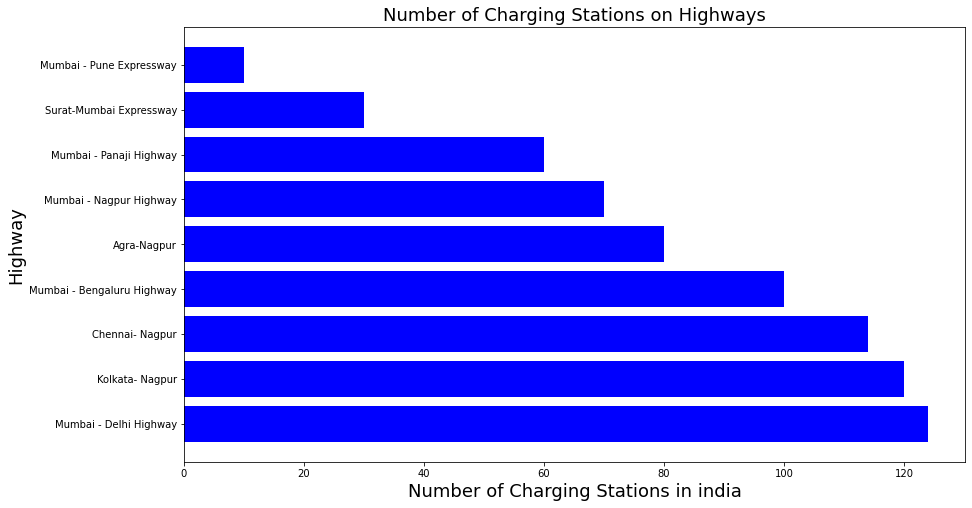

In [14]:
plot_frequency(cs_highways,"Highways/Expressways","Charging Stations", "Number of Charging Stations in india",
               "Highway","Number of Charging Stations on Highways",'Blue')

**Based on number of charging stations, the following city / state could be targeted**

- Mumbai (Maharashtra)
- Nagpur (Maharashtra)
- Delhi
- Bengaluru (Karnataka)
- Agra (Uttar Pradesh)
- Kolkata(West Bengal)


## Sanctioned Charging Stations:

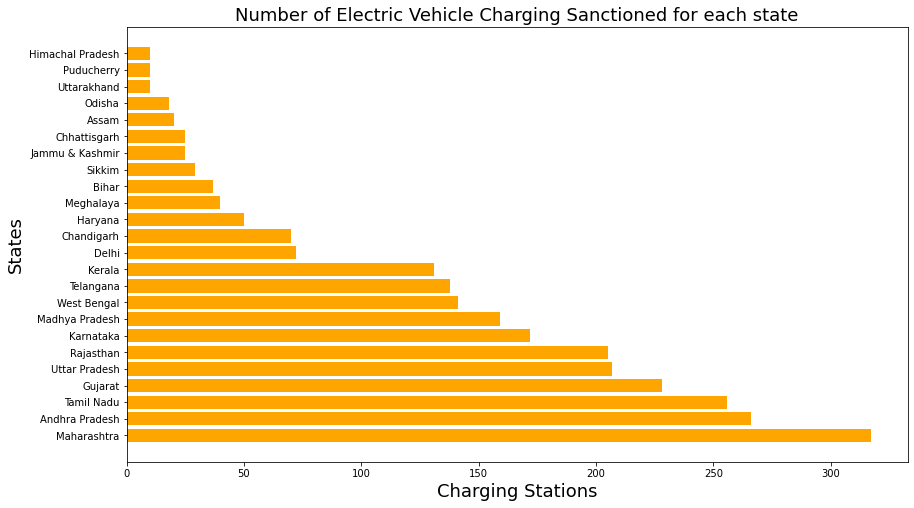

In [15]:
plot_frequency(cs_sanctioned,'State/UT-wise','Number of Electric Vehicle Charging Sanctioned','Charging Stations','States',
               'Number of Electric Vehicle Charging Sanctioned for each state','orange')

**States to target based on charging stations sanctioned**

- Maharashtra
- Andhra Pradesh
- Tamil Nadu
- Gujarat
- Uttar Pradesh
- Rajasthan
- Karnataka
- West Bengal 
- Telangana
- Kerala 

## Integrating data for EV of all states:

In [16]:
def get_all_data(state,state_name):
    """
    This function combines the data for electric vehicle across all states
    
    """
    data = get_data(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle Class'] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    new_frame = frame.reset_index().drop(["index"], axis=1)
    new_frame["ELECTRIC(BOV)"] = [z.replace(',','') for z in new_frame["ELECTRIC(BOV)"].values]
    new_frame["ELECTRIC(BOV)"] = new_frame["ELECTRIC(BOV)"].astype(float)
    new_frame['State'] = [state_name for i in range(new_frame.shape[0])]
    return new_frame[["Vehicle Class","ELECTRIC(BOV)","State"]]

In [17]:
# list of name of csv files of every state
data_files = ["/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_AP.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_assam.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_bihar.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_chandigarh.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_chhatisgarh.xlsx",
              "/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_Delhi.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_guj.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_haryana.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_HP.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_jammu.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_karnataka.xlsx",
              "/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_kerala.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_maharashtra.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_meghalaya.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_MP.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_odisha.xlsx",
              "/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_puducherry.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_rajasthan.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_sikkim.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_TN.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_UP.xlsx",
              "/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_uttarakhand.xlsx","/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_WB.xlsx"]

In [18]:
# list of state names, these will be column values
states = ["Andhra Pradesh","Assam","Bihar","Chandigarh","Chhatisgarh","Delhi","Gujarat","Haryana","Himachal Pradesh",
         "Jammu & Kashmir","Karnataka","Kerala","Maharashtra","Meghalaya","Madhya Pradesh","Odisha","Puducherry",
          "Rajasthan","Sikkim","Tamil Nadu","Uttar Pradesh","Uttarakhand","West Bengal"]

In [19]:
# storing each dataframe to concatenate in the below list
concat_states = []
for i,j in zip(data_files,states):
    concat_states.append(get_all_data(i,j)) # calling the above defined function

In [20]:
final_df = pd.concat(concat_states,axis = 0) # concatenating all the dataframes (by rows)

In [21]:
final_df

,Vehicle Class,ELECTRIC(BOV),State
0,BUS,0.0,Andhra Pradesh
1,E-RICKSHAW(P),397.0,Andhra Pradesh
2,E-RICKSHAW WITH CART (G),260.0,Andhra Pradesh
3,M-CYCLE/SCOOTER,10718.0,Andhra Pradesh
4,M-CYCLE/SCOOTER-WITH SIDE CAR,601.0,Andhra Pradesh
...,...,...,...
7,MOTOR CAR,1117.0,West Bengal
8,OMNI BUS,0.0,West Bengal
9,THREE WHEELER (GOODS),377.0,West Bengal
10,THREE WHEELER (PASSENGER),392.0,West Bengal


groupby via states 

In [22]:
mean_ev = final_df.groupby(by = "State").mean() # group by each state and return the average number of EV being used

# Average number of electric vehicles across all states

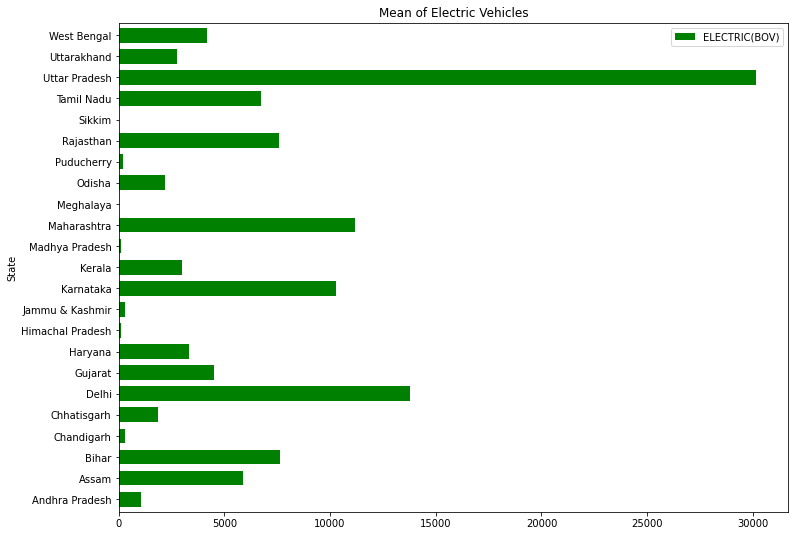

In [23]:
mean_ev.plot.barh(figsize = (12,9), width = 0.7,title = 'Mean of Electric Vehicles', color = 'green')
plt.show()

**States to target :**
- Maharashtra
- Uttar Pradesh
- Karnataka
- Gujarat
- Delhi
- Rajasthan
- Haryana
- Bihar

# Vehicle Class wise fuel data:

In [24]:
def get_imp_vehicle(state):
    """
    This function returns the dataframe with important fuel types and rows containing the
    vehicle spaces to target
    
    """
    data = get_data(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle Class'] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    new_frame = frame.reset_index().drop(["index"], axis=1)
    
    # cleaning the numerical features (Example : 12,200 is converted to 12200)
    
    new_frame["CNG ONLY"] = [z.replace(',','') for z in new_frame["CNG ONLY"].values]
    new_frame["DIESEL"] = [z.replace(',','') for z in new_frame["DIESEL"].values]
    new_frame["ELECTRIC(BOV)"] = [z.replace(',','') for z in new_frame["ELECTRIC(BOV)"].values]
    new_frame["PETROL"] = [z.replace(',','') for z in new_frame["PETROL"].values]
    
    # the numerical features are string type, so converting them to float
    
    new_frame["CNG ONLY"] = new_frame["CNG ONLY"].astype(float)
    new_frame["DIESEL"] =  new_frame["DIESEL"].astype(float)
    new_frame["ELECTRIC(BOV)"] = new_frame["ELECTRIC(BOV)"].astype(float)
    new_frame["PETROL"] = new_frame["PETROL"].astype(float)
        
    return new_frame

# Visualizing the type of fuel used for every vehicle class & which vehicle space uses Battery operated fuel (EV)


##  **Maharashtra**



In [26]:
mh = get_imp_vehicle("/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_maharashtra.xlsx")
mh

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,BUS,7515.0,109628.0,1116.0,1916.0
1,E-RICKSHAW(P),0.0,30.0,6020.0,108.0
2,E-RICKSHAW WITH CART (G),0.0,0.0,2132.0,0.0
3,M-CYCLE/SCOOTER,0.0,5537.0,106327.0,22876524.0
4,M-CYCLE/SCOOTER-WITH SIDE CAR,0.0,7.0,9.0,6040.0
5,MOPED,0.0,26.0,4092.0,239116.0
6,MOTOR CAB,1542.0,149928.0,798.0,10683.0
7,MOTOR CAR,1094.0,1971766.0,12609.0,2682375.0
8,OMNI BUS,3.0,375.0,0.0,182.0
9,THREE WHEELER (GOODS),6987.0,74826.0,912.0,563.0


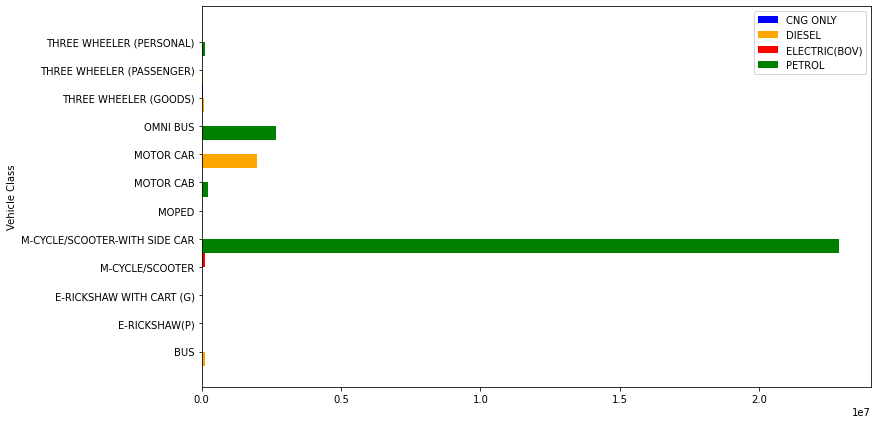

In [27]:
mh.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 2.0)
plt.show()

- **The above shows all the types of fuels used for various vehicle.**

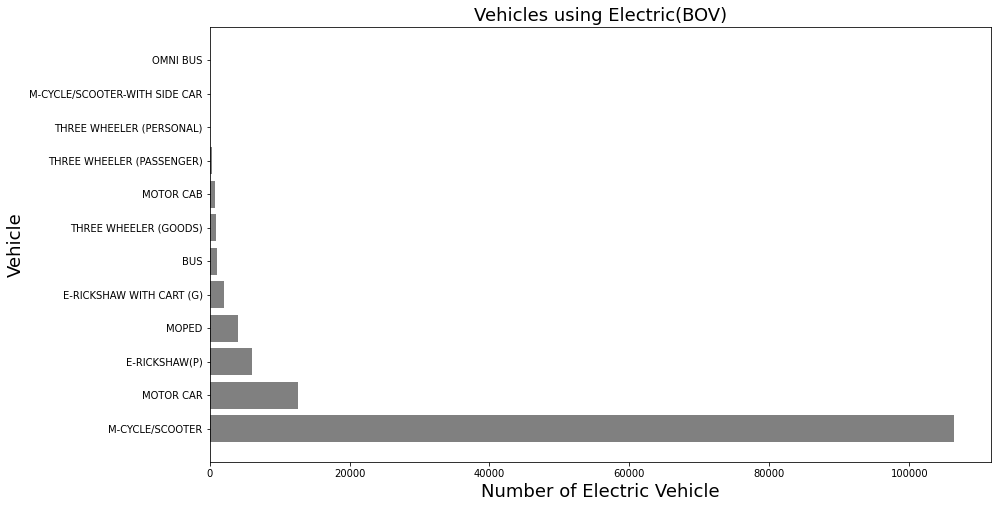

<Figure size 720x504 with 0 Axes>

In [28]:
plot_frequency(mh,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')
plt.figure(figsize=(10,7))
plt.show()

- **For the maharashtra state, the above shows which vehicle space to target when it comes to EV(Battery operated vehicle).**

# Uttar Pradesh:

In [29]:
up = get_imp_vehicle("/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_UP.xlsx")

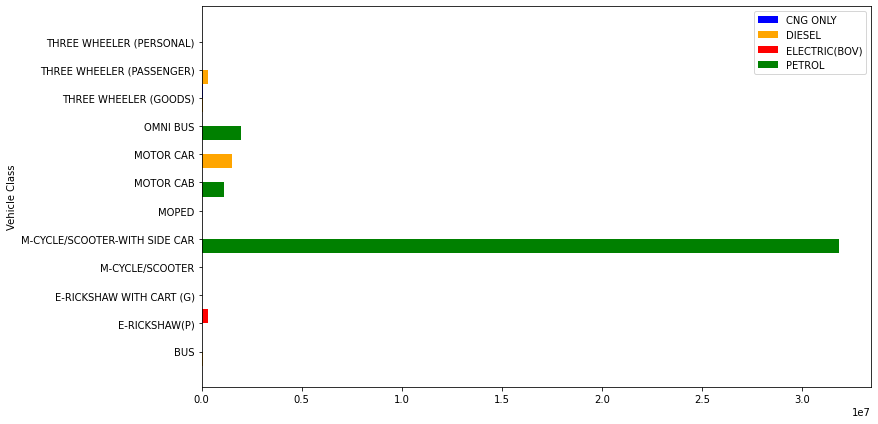

In [30]:
up.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 2.0)
plt.show()

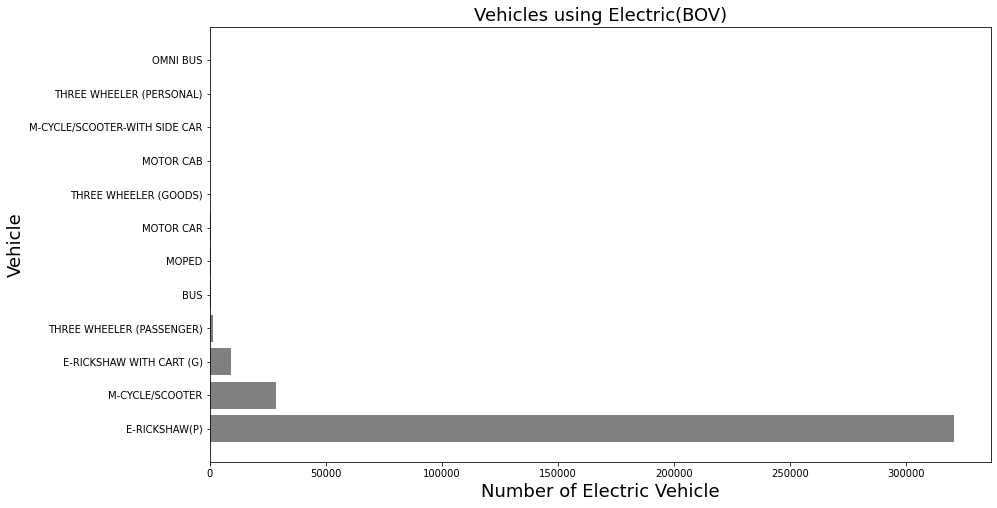

In [31]:
plot_frequency(up,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

# Delhi:

In [32]:
ap = get_imp_vehicle("/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_Delhi.xlsx")

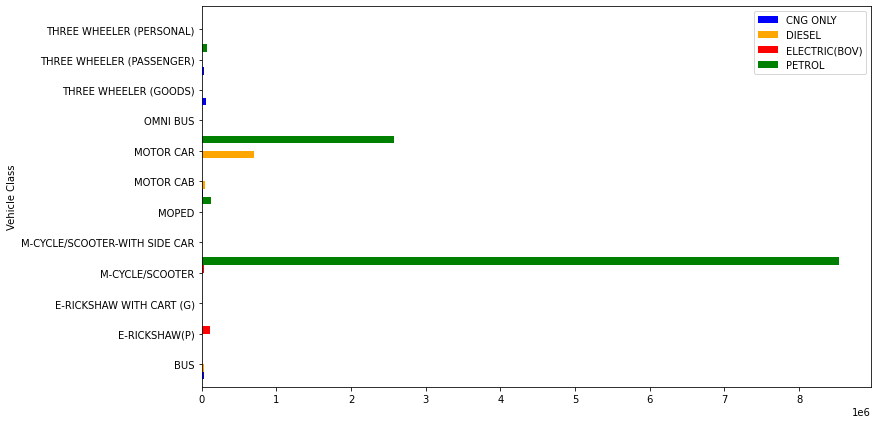

In [33]:
ap.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 1.0)
plt.show()

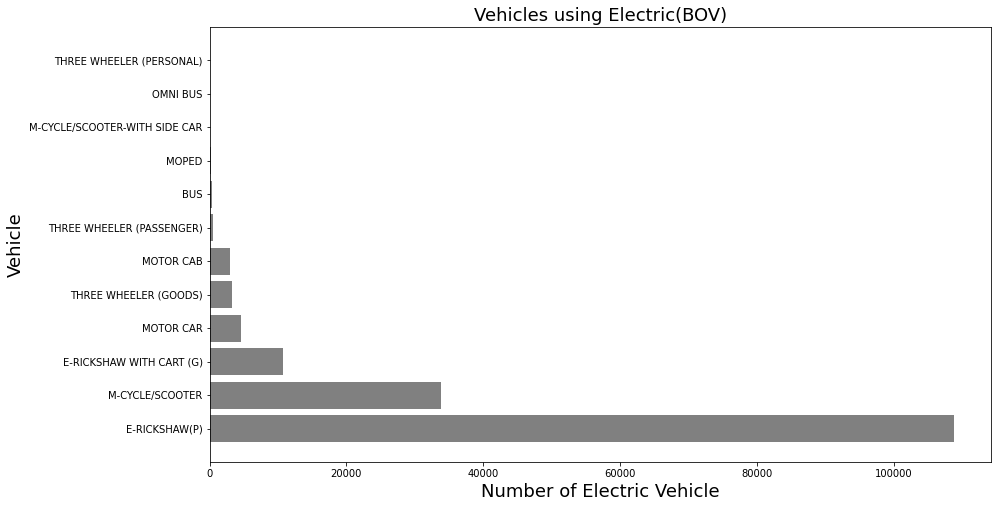

In [34]:
plot_frequency(ap,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

# Karnataka:

In [35]:
tn = get_imp_vehicle("/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_karnataka.xlsx")

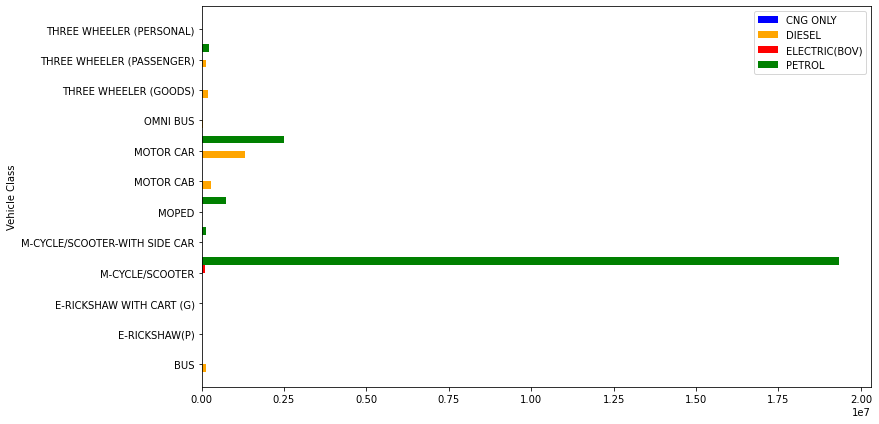

In [36]:
tn.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 1.0)

# Gujarat:

In [37]:
gj = get_imp_vehicle("/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_guj.xlsx")

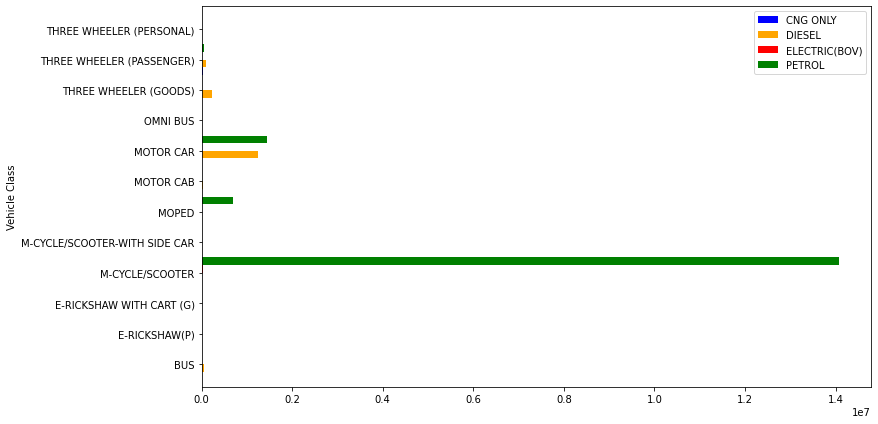

In [38]:
gj.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 1.0)

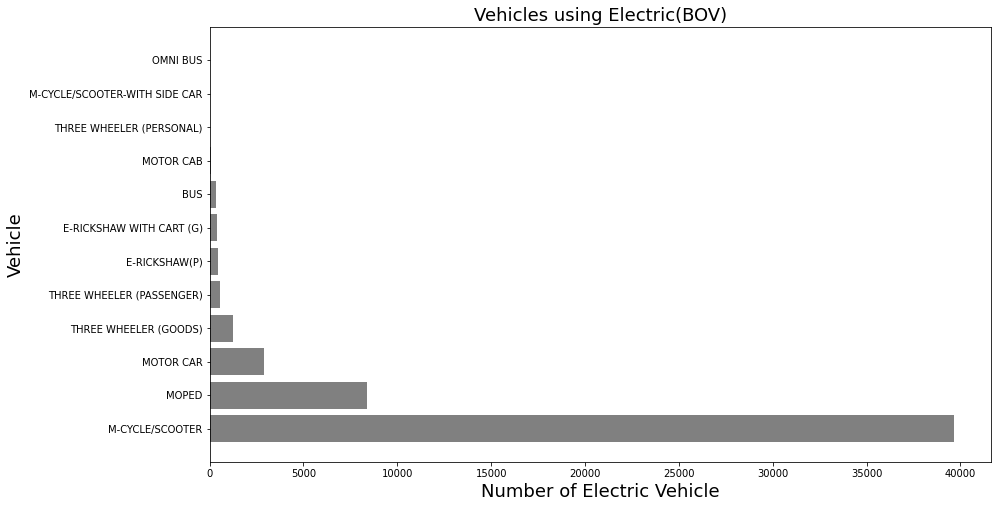

In [39]:
plot_frequency(gj,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

# Rajasthan:

In [40]:
rj = get_imp_vehicle("/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_rajasthan.xlsx")

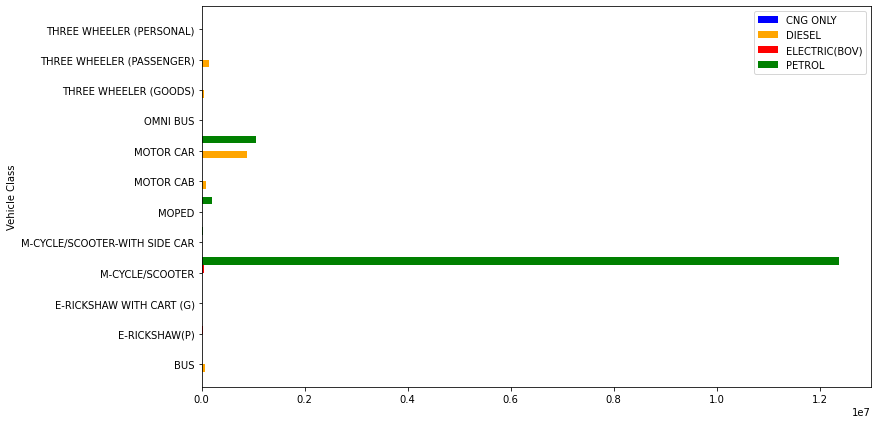

In [41]:
rj.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 1.0)

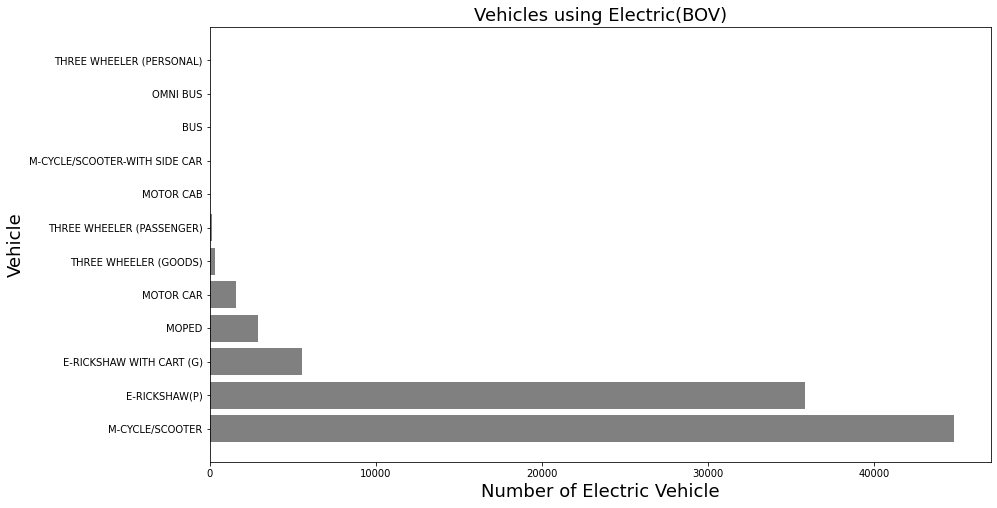

In [42]:
plot_frequency(rj,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

# Haryana:

In [43]:
h = get_imp_vehicle("/content/drive/MyDrive/Datasets/Electric_vehicle _dataset/Geographical Segmentation/Datasets/type_haryana.xlsx")

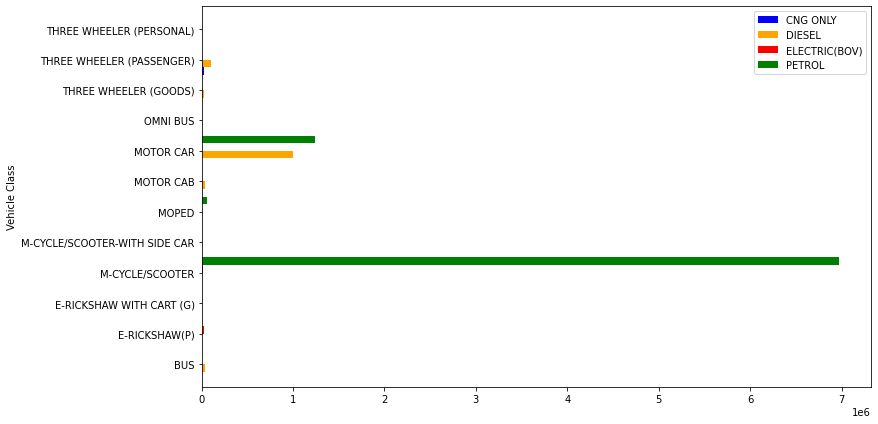

In [44]:
h.plot.barh(x = 'Vehicle Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 1.0)

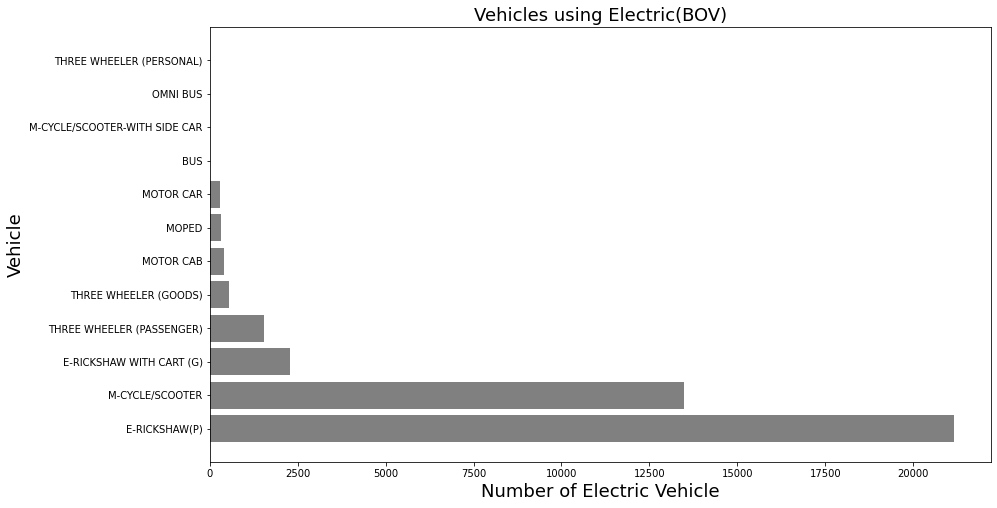

In [45]:
plot_frequency(h,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

we clearly analyze all the geographic area so this is helpful to find the insight whic state is target for selling evs and also helpful to find which product we will sell in which area  

These types of things is helful for market segmentation :